In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

eq_df = pd.read_csv('pyramids.csv')
eq_df

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.00,109.00,60.00,NaN,330.4,29.871215,31.216644,Step,XXXII,Limestone,NaN
1,Sekhemkhet,-,Buried Pyramid,3,Saqqara,120.00,120.00,7.00,NaN,33.6,29.866000,31.213000,Step,NaN,Limestone,(unfinished)
2,Khaba (?),-,Layer Pyramid,3,Zawyet el'Aryan,84.00,84.00,20.00,NaN,47.04,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,-,Pyramid Lepsius I,3,Abu Rawash,215.00,215.00,150.00,NaN,NaN,30.040833,31.094444,Step,I,Mudbrick,NaN
4,Huni (?),-,Pyramid of Athribis,3,Athribis,20.00,20.00,16.00,50.0,NaN,30.470556,31.188056,Step,NaN,Mudbrick,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Khendjer,-,Pyramid of Khendjer,13,South Saqqara,52.50,52.50,37.35,55.0,44.096,29.832222,31.223889,True,XLIV,Mudbrick,SIP
58,Weserkhau (?),-,Southern South Saqqara pyramid,13,South Saqqara,78.75,78.75,NaN,NaN,NaN,29.830556,31.222222,True,XLVI,Mudbrick,SIP
59,Neferhotep I,-,Tomb S9,13,Abydos,45.00,60.00,NaN,NaN,NaN,26.171389,31.925000,Mastaba,NaN,Mudbrick,SIP
60,Sobekhotep IV,-,Tomb S10,13,Abydos,40.00,30.00,NaN,NaN,NaN,26.171111,31.924167,Mastaba,NaN,Mudbrick,SIP


In [25]:
#eq_df.rename(columns={'Date':'Day', 'LATATITUDE (N)':'Lat', 'LONGITUDE  (E)' : 'Long', 'MAGNITUDE (Richter)' : 'Magn' }, inplace=True)
eq_df.info()
eq_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 16 columns):
Pharaoh             62 non-null object
Ancient name        62 non-null object
Modern name         62 non-null object
Dynasty             62 non-null int64
Site                62 non-null object
Base1 (m)           62 non-null object
Base2 (m)           62 non-null object
Height (m)          52 non-null object
Slope (dec degr)    40 non-null float64
Volume (cu.m)       33 non-null object
Latitude            62 non-null float64
Longitude           62 non-null float64
Type                62 non-null object
Lepsius             44 non-null object
Material            61 non-null object
Comment             20 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 7.9+ KB


,Dynasty,Slope (dec degr),Latitude,Longitude
count,62.000000,40.000000,62.000000,62.000000
mean,6.403226,57.980750,29.226241,31.319200
std,3.889708,11.100038,1.497457,0.446828
min,3.000000,42.580000,24.085556,30.828611
25%,4.000000,51.960000,29.621458,31.136257
50%,5.000000,53.130000,29.850834,31.212611
75%,8.000000,57.945000,29.924281,31.221598
max,18.000000,82.000000,30.470556,32.885278


In [27]:
import folium
from folium.features import DivIcon

m = folium.Map([eq_df['Latitude'].mean(), eq_df['Longitude'].mean()], #center of a map
               zoom_start=6,  # max zoom is 18; restrict zooms not to scroll nuch
               width = 600, height = 700)

#folium.LatLngPopup().add_to(m) # add custom popup of lat/long of selected point

for i in range(0,len(eq_df)):
    #folium.Circle([eq_df.iloc[i]['Latitude'], eq_df.iloc[i]['Longitude']], 150, color = 'Red', fill=True).add_to(m)
    folium.Marker([eq_df.iloc[i]['Latitude'], eq_df.iloc[i]['Longitude']], 
                  popup=eq_df.iloc[i]['Modern name']
        ).add_to(m) # add popup to markers as an accident year
m

In [28]:
def color(dyn): 
    if dyn in range(1,4): #early dynastic period
        col = 'green'
    elif dyn in range(4,11): #old kingdom
        col = 'blue'
    elif dyn in range(11,15): # middle kingdom 
        col = 'orange'
    else: 
        col='red'
    return col

In [44]:
m = folium.Map([eq_df['Latitude'].mean(), eq_df['Longitude'].mean()], #center of a map
               zoom_start=6,  # max zoom is 18; restrict zooms not to scroll nuch
               width = 600, height = 700)

for i in range(0,len(eq_df)):
    folium.Marker([eq_df.iloc[i]['Latitude'], eq_df.iloc[i]['Longitude']], 
                  popup=eq_df.iloc[i]['Modern name'], icon= folium.Icon(color=color(eq_df.iloc[i]['Dynasty']), icon='flag')
        ).add_to(m) # add popup to markers as an accident year
m

In [37]:
def color_material(material): 
    if material =='Limestone': #Limestone
        col = 'white'
    elif material == 'Mudbrick': #Mudbrick
        col = 'beige'
    elif str(material).find("granite"): # middle kingdom 
        col = 'black'
    else: 
        col='gray'
    return col

In [49]:
legend_html = '''
     <div style= "position: fixed; 
     bottom: 20px; left: 20px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:green"></i><br>
     &nbsp; West &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:red"></i>
      </div>
     '''

In [50]:
m = folium.Map([eq_df['Latitude'].mean(), eq_df['Longitude'].mean()], #center of a map
               zoom_start=6,  # max zoom is 18; restrict zooms not to scroll nuch
               width = 500, height = 600)

for i in range(0,len(eq_df)):
    folium.Marker([eq_df.iloc[i]['Latitude'], eq_df.iloc[i]['Longitude']], 
                  popup=eq_df.iloc[i]['Modern name'], icon= folium.Icon(color=color_material(eq_df.iloc[i]['Material']))
        ).add_to(m) 

m.get_root().html.add_child(folium.Element(legend_html))
m

In [ ]:
text = eq_df.iloc[i]['Dynasty']
    
    
    folium.Marker([eq_df.iloc[i]['Latitude'], eq_df.iloc[i]['Longitude']], 
                  popup=eq_df.iloc[i]['Modern name'], icon=DivIcon(
        icon_size=(50,15),
        icon_anchor=(10,10),
        html='<div style="font-size: 10pt">%s</div>' % text,
        )).add_to(m) # add popup to markers as an accident year

In [12]:
eq_gr = eq_df[eq_df.Country == 1]
eq_gr = eq_gr.drop(columns='Country')
eq_gr

,Year,Month,Day,Hours,Minutes,Lat,Long,Magn
0,1901,9,12,6,15,39.00,22.20,5.6
1,1901,10,25,16,18,37.00,22.20,5.4
2,1901,12,24,23,18,37.20,22.20,5.8
3,1902,4,11,18,35,38.50,23.50,5.8
4,1902,7,5,14,56,40.80,23.20,6.6
...,...,...,...,...,...,...,...,...
256647,2018,5,29,6,11,37.46,21.82,3.3
256648,2018,5,29,7,0,37.95,22.02,2.3
256649,2018,5,29,7,44,38.36,21.84,2.1
256650,2018,5,29,9,29,38.57,20.96,1.7


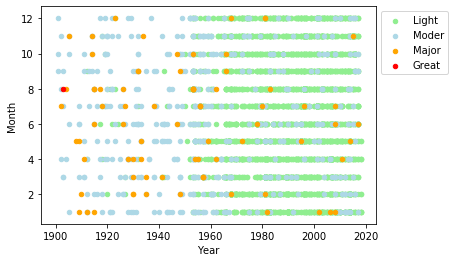

In [13]:
eq_minor = eq_gr.loc[(eq_gr['Magn'] > 0) & (eq_gr['Magn'] < 4.0)]
eq_light = eq_gr.loc[(eq_gr['Magn'] >= 4.0) & (eq_gr['Magn'] < 5.0)]
eq_moder = eq_gr.loc[(eq_gr['Magn'] >= 5.0) & (eq_gr['Magn'] < 6.0)]
eq_major = eq_gr.loc[(eq_gr['Magn'] >= 6.0) & (eq_gr['Magn'] < 8)]
eq_great = eq_gr.loc[eq_gr['Magn'] >= 8.0]

ax1 = eq_light.plot(kind='scatter', x='Year', y='Month', color='lightgreen', label='Light')
ax2 = eq_moder.plot(kind='scatter', x='Year', y='Month', color='lightblue',  label='Moder', ax=ax1)
ax3 = eq_major.plot(kind='scatter', x='Year', y='Month', color='orange', label='Major', ax=ax1)
ax4 = eq_great.plot(kind='scatter', x='Year', y='Month', color='r', label='Great',  ax=ax1)
ax1.legend(bbox_to_anchor=(1., 1.))

In [33]:
eq_gr_major = eq_gr.loc[eq_gr['Magn'] > 3.5]
eq_gr_major

,Year,Month,Day,Hours,Minutes,Lat,Long,Magn
0,1901,9,12,6,15,39.00,22.20,5.6
1,1901,10,25,16,18,37.00,22.20,5.4
2,1901,12,24,23,18,37.20,22.20,5.8
3,1902,4,11,18,35,38.50,23.50,5.8
4,1902,7,5,14,56,40.80,23.20,6.6
...,...,...,...,...,...,...,...,...
256068,2018,5,10,6,13,37.82,22.91,3.7
256276,2018,5,16,22,30,36.55,22.92,4.6
256278,2018,5,16,22,41,36.50,22.93,3.6
256411,2018,5,20,22,17,34.89,23.97,4.2


In [34]:
import sklearn
from sklearn import svm, preprocessing
from sklearn.linear_model import SGDRegressor
eq_gr_major = sklearn.utils.shuffle(eq_gr_major) # always shuffle your data to avoid any biases that may emerge b/c of some order.

X = eq_gr_major.drop("Magn", axis=1).values
X = preprocessing.scale(X)
y = eq_gr_major["Magn"].values
print(len(y))

12421


In [35]:
test_size = 300

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [36]:
clf = svm.SVR(kernel="linear")
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
print(clf.score(X_test, y_test))

0.12181591967179639


In [38]:
for X,y in list(zip(X_test, y_test))[:10]:
    print(f"model predicts {clf.predict([X])[0]}, real value: {y}")

model predicts 4.082892366749404, real value: 6.0
model predicts 3.912375469842691, real value: 3.8
model predicts 3.8784247833176657, real value: 5.1
model predicts 3.700856072722934, real value: 3.9
model predicts 3.7536340519622517, real value: 3.6
model predicts 3.7957822040681495, real value: 3.6
model predicts 3.745717867538157, real value: 3.7
model predicts 3.866709738248502, real value: 3.7
model predicts 4.016708587765519, real value: 4.0
model predicts 3.7257831049581767, real value: 4.6


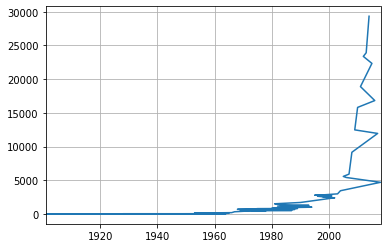

In [14]:
count_y = eq_df['Year'].value_counts()
count_y.plot(grid=True)

,Year,Month,Day,Hours,Minutes,Lat,Long,Magn,Country
32309,1998,1,1,1,30,38.67,22.42,2.7,True
32310,1998,1,1,2,11,39.66,21.16,3.0,True
32314,1998,1,1,4,41,36.55,23.18,3.0,True
32315,1998,1,1,5,41,38.76,21.62,2.8,True
32318,1998,1,1,7,26,38.80,21.50,3.0,True
...,...,...,...,...,...,...,...,...,...
256647,2018,5,29,6,11,37.46,21.82,3.3,True
256648,2018,5,29,7,0,37.95,22.02,2.3,True
256649,2018,5,29,7,44,38.36,21.84,2.1,True
256650,2018,5,29,9,29,38.57,20.96,1.7,True


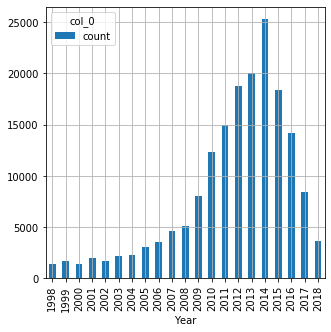

In [15]:
eq_df_20y = eq_gr[eq_gr['Year']>=1998]
pd.crosstab(index=eq_df_20y['Year'], columns='count').plot(kind='bar', figsize=(5,5), grid=True)
eq_df_20y

In [16]:
eq_2014 = eq_gr[eq_gr['Year']==2014]
eq_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25264 entries, 171530 to 200862
Data columns (total 9 columns):
Year       25264 non-null int64
Month      25264 non-null int64
Day        25264 non-null int64
Hours      25264 non-null int64
Minutes    25264 non-null int64
Lat        25264 non-null float64
Long       25264 non-null float64
Magn       25264 non-null float64
Country    25264 non-null bool
dtypes: bool(1), float64(3), int64(5)
memory usage: 1.8 MB


In [17]:
m = folium.Map([eq_2014['Lat'].mean(), eq_df['Long'].mean()], #center of a map
               zoom_start=6, min_zoom = 5, max_zoom = 11, # max zoom is 18; restrict zooms not to scroll nuch
               width = 800, height = 600)

folium.GeoJson(gr).add_to(m) # add gr - multipolygon of greek boundaries
folium.LatLngPopup().add_to(m) # add custom popup of lat/long of selected point

for i in range(0,len(eq_2014[eq_2014.Magn>=3.9])): # add markers of first 25 earthquakes of the dataset
    folium.Circle(
        radius=3000 * eq_2014.iloc[i]['Magn'],
        location=[eq_2014.iloc[i]['Lat'], eq_2014.iloc[i]['Long']],
        popup=str(eq_2014.iloc[i]['Month']) + "-" + str(eq_2014.iloc[i]['Day']),
        color='red',
        fill=False,
    ).add_to(m) # add popup to markers as an accident year
m

In [18]:
import sklearn
from sklearn import svm, preprocessing
from sklearn.linear_model import SGDRegressor
eq_df_20y = sklearn.utils.shuffle(eq_df_20y) # always shuffle your data to avoid any biases that may emerge b/c of some order.

X = eq_df_20y.drop("Magn", axis=1).values
X = preprocessing.scale(X)
y = eq_df_20y["Magn"].values
print(len(y))

172985


In [19]:
test_size = 400

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [20]:
clf = svm.SVR(kernel="linear")
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
print(clf.score(X_test, y_test))

0.33575878976203166


In [23]:
for X,y in list(zip(X_test, y_test))[:20]:
    print(f"model predicts {clf.predict([X])[0]}, real value: {y}")

model predicts 1.696831090809282, real value: 1.5
model predicts 1.9247029611509334, real value: 1.5
model predicts 2.000557138543381, real value: 1.7
model predicts 2.082857803038155, real value: 2.4
model predicts 2.5271666547991263, real value: 3.3
model predicts 1.5369087357212274, real value: 1.7
model predicts 2.383082425710885, real value: 2.7
model predicts 2.247656402171435, real value: 1.9
model predicts 3.6880990647964627, real value: 3.3
model predicts 2.024048267897776, real value: 1.3
model predicts 2.0821543252651415, real value: 1.3
model predicts 2.3495538847583104, real value: 2.7
model predicts 1.708465705008826, real value: 1.6
model predicts 3.5015360614888795, real value: 3.3
model predicts 1.4771412486498448, real value: 2.2
model predicts 2.031755016981485, real value: 1.9
model predicts 1.7592947700675867, real value: 1.5
model predicts 2.224126216676082, real value: 2.8
model predicts 2.5285645795389593, real value: 3.0
model predicts 2.5619886614230802, real 

In [45]:
import pandas as pd
import folium
#zip file from the census site
file_url = 'http://www2.census.gov/geo/docs/maps-data/data/gazetteer/2016_Gazetteer/2016_Gaz_zcta_national.zip'
#Pandas usually infers zips as numerics, but we lose our leading zeroes so let's go with the object dtype
df = pd.read_csv(file_url, sep='\t', dtype={'GEOID' : object})
#some column names have some extra padding
df.columns = df.columns.str.strip()
df.head()

HTTPError: HTTP Error 503: Service Unavailable